In [1]:
import pandas as pd
import numpy as np
from plotnine import *

%matplotlib inline


/home/samanthahoffman/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
lol = [1,3,4,5,6,7,8,3,4,3,6,5,3]
brah = [2,4,2,6,3,4,5,6,7,2,4,5,6]
lolframe = pd.DataFrame({'lol':lol, 'brah':brah})

In [6]:
lolframe.columns = ['lol', 'brah']

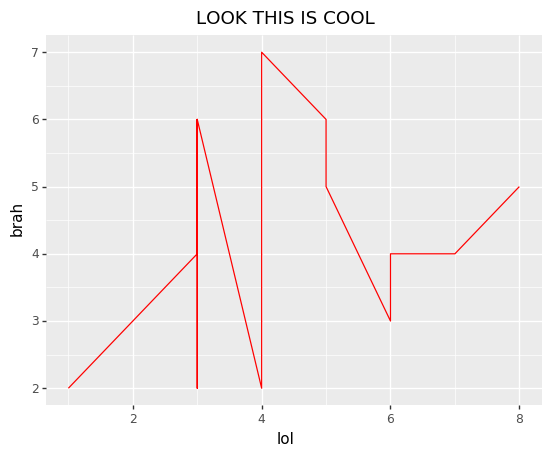

<ggplot: (-9223363302218010841)>

In [12]:
(ggplot(lolframe) 
 + geom_line(aes(x = lol, y = brah), color = "red") 
 + ggtitle("LOOK THIS IS COOL")
 + xlab("lol")
 + ylab("brah")
)

In [75]:
bro = pd.read_json("./evals/evals_json_version_1.json")

In [76]:
low_list = []
med_list = []
high_list = []
for row in bro.itertuples():
    time = row.time_stats
    if isinstance(time, float):
        low_list.append("nan")
        med_list.append("nan")
        high_list.append("nan")
    else:
        low_list.append(time[0])
        med_list.append(time[1])
        high_list.append(time[2])

In [77]:
lowframe = pd.DataFrame(low_list)
medframe = pd.DataFrame(med_list)
highframe = pd.DataFrame(high_list)

In [78]:
bro = pd.concat([bro, lowframe], axis = 1)

In [79]:

bro = pd.concat([bro, medframe], axis = 1)
bro = pd.concat([bro, highframe], axis = 1)
cols = list(bro.columns)
cols[-1] = 'high'
cols[-2] = 'med'
cols[-3] = 'low'
bro.columns = cols

In [82]:
bro.dropna(axis = 0, how = 'any', inplace = True)

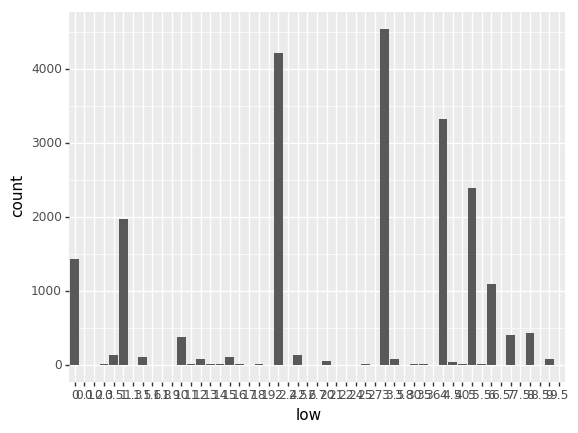

<ggplot: (8734625830285)>

In [105]:
(ggplot(bro)
+ geom_bar(aes('low')))